In [1]:
 import pandas as pd

In [68]:
raw = pd.read_csv('tmp/data/0425_result/result_870_mean_promo_with_season_180201_0515.csv')
ts = pd.read_csv('tmp/data/simplified_ts_870.csv')

In [37]:
file_path = 'tmp/data/870_ts.da'
ts_df = pd.read_csv(file_path,header=None,sep='\t')
ts_df.columns = ['Date', 'ind', 'RDCKey', 'ProductKey', 'HierarchyLevel1Key', 'HierarchyLevel2Key', 'HierarchyLevel3Key', 'brand_code', 'sales', 'priceAfterDiscount', 'jd_prc', 'vendibility', 'counterState', 'salesForecast', 'reserveState', 'stockQuantity', 'utc_flag']

sum_df = ts_df.groupby(['Date'])['salesForecast'].sum().reset_index()

sum_df.Date = pd.to_datetime(sum_df.Date)

tmp_sum_df = sum_df[sum_df.Date > '2016-02-01']

tmp_sum_df.set_index('Date').plot()

tmp1 = ts_df.loc[ts_df.ProductKey==3487477,['Date','RDCKey','ProductKey','salesForecast','priceAfterDiscount','jd_prc']]

tmp1.head()

from collections import OrderedDict
tmp2 = tmp1.groupby(['Date','ProductKey']).agg(OrderedDict([('priceAfterDiscount', np.min),('jd_prc', np.min),('salesForecast',np.sum)])).reset_index()

tmp2.Date = pd.to_datetime(tmp2.Date)

tmp2[tmp2.Date.between('2017-05-01','2017-07-01')]

tmp2[['Date','salesForecast']].set_index('Date').plot()

In [69]:
df1 = raw.groupby(['Date','ProductKey'])['salesForecast','ypred'].sum().reset_index()
actual = ts.groupby(['Date','ProductKey'])['salesForecast'].sum().reset_index()

In [79]:
df11 = pd.merge(df1[['Date','ProductKey','ypred']],actual,how='left',on=['Date','ProductKey'])

In [86]:
df = df11.groupby('ProductKey').sum().reset_index()

In [72]:
 import numpy as np

In [89]:
df.ypred.sum()

38333.629781408265

In [90]:
df.salesForecast.sum()

27797.0

In [87]:
df['resi'] = np.abs(df.ypred - df.salesForecast)

In [88]:
df.resi.sum() / df.salesForecast.sum()

0.5160816401718017

In [74]:
df.sort_values(by='resi',inplace=True, ascending=False)

In [75]:
df.reset_index(inplace=True)

In [76]:
df.head(13)

,index,ProductKey,ypred,salesForecast,resi
0,225,1311928,1705.373243,654.0,1051.373243
1,314,1887255,1087.445195,503.0,584.445195
2,649,2743359,857.095052,284.0,573.095052
3,372,1993070,1161.682821,673.0,488.682821
4,750,2942414,700.379608,330.0,370.379608
5,374,1993087,1480.252188,1120.0,360.252188
6,376,1993089,1050.479844,742.0,308.479844
7,648,2743357,388.734286,126.0,262.734286
8,477,2215796,488.255402,229.0,259.255402
9,779,3082122,1274.799469,1524.0,249.200531


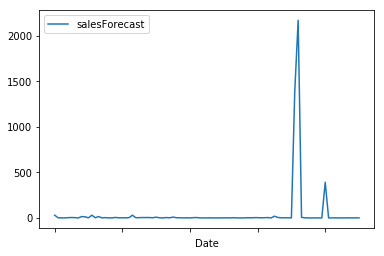

In [25]:
tmp[['Date','salesForecast']].set_index('Date').plot()